#### Requirements and preamble

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

# from benchmark_utils import print_dict, score_ts
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

## Set helvetica font
plt.rcParams.update({'font.family': 'Helvetica'})

%load_ext autoreload
%autoreload 2

DARK_FLAG = False
if DARK_FLAG:
    plt.style.use('dark_background')
    fill_color = 'w'
    background_color = 'k'
else:
    fill_color = 'k'
    background_color = 'w'

import degas as dg
colors = [dg.blue, dg.lighter(dg.purple), dg.turquoise, dg.orange, dg.red][::-1]
gray = np.ones(3) * 0.7
colors += [gray]*30

plt.rcParams.update({'axes.titlesize': 16, 'axes.labelsize': 16})


def boxplot(y, x=None, colors=None, agg="medians", **kwargs):
    if x is None:
        x = np.arange(y.shape[1])
    box = plt.boxplot(
        y,
        labels=x, patch_artist=True, showfliers=False, 
        # widths=0.25, 
        whis=0.75,
        positions=np.arange(len(x)),
        **kwargs
    )

    if colors is None:
        return box

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_linewidth(0)
        patch.set_edgecolor(color)

    for median, color in zip(box['medians'], colors):
        median.set_color("w")
        median.set_linewidth(2)

    for i, (cap, whisker) in enumerate(zip(box['caps'], box['whiskers'])):
        color = colors[i // 2]
        whisker.set_color(color)
        cap.set_color(color)
        whisker.set_linewidth(2)
        cap.set_linewidth(2)

def strip_plot(y, x=None, colors=None, agg=None, agg_kw={}, **kwargs):
    """
    Create a strip plot with the given data.

    Args:
        y (np.array): data to plot. Shape (N, D) where N is the number of samples and 
            D is the number of dimensions.
        x (np.array): x-axis values. Shape (D,) where D is the number of dimensions.
        all_colors (list): list of colors for each dimension.
        agg (function): aggregation function to apply to y. Default is None.
        agg_kw (dict): keyword arguments for the aggregation function.
        **kwargs: additional keyword arguments for the scatter plot.

    Returns:
        None
    """
    if x is None:
        x = np.arange(y.shape[1])
    N, D = y.shape
    
    for d in range(D):
        xs = [x[d]] * N
        ys = y[:, d]
        # print(N, D, len(xs), len(ys))
        if colors is not None:
            kwargs['color'] = colors[d]
        ## turn of edge color
        kwargs['edgecolor'] = 'none'
        plt.scatter(xs, ys, **kwargs)

    if agg is not None:
        agg_y = agg(y, axis=0)
        for d in range(D):
            if colors is not None and 'color' not in agg_kw:
                agg_kw['color'] = colors[d]
            plt.scatter(x[d], agg_y[d], **agg_kw)

if DARK_FLAG:
    dark_str = "_dark"
else:
    dark_str = ""



## Plot ablations

/var/folders/79/zct6q7kx2yl6b1ryp2rsfbtc0000gr/T/ipykernel_48515/1098234871.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


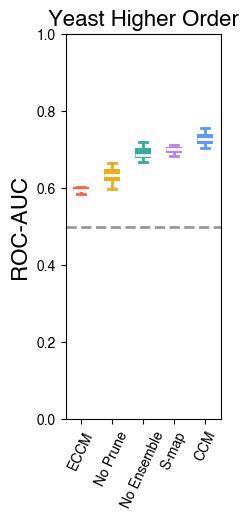

In [4]:
import degas as dg
all_results = pd.DataFrame()
# metric_name = 'AUPRC Multiplier'
metric_name = 'AUPRC'
metric_name = 'ROC-AUC'
# metric_name = "Top-50 Accuracy"
ORGANISM_NAME = "yeast"
HIGHER_ORDER = True
# metric_name = 'ROC-AUC Multiplier'

if HIGHER_ORDER:
    higher_order = "_higher_order"
else:
    higher_order = ""

all_datasets = [
    ("ECCM", f"{ORGANISM_NAME}{higher_order}_scores_simplex_smap_ensemble_prune.txt"),
    ("No Prune", f"{ORGANISM_NAME}{higher_order}_scores_simplex_smap_ensemble_noprune.txt"),
    ("No Ensemble", f"{ORGANISM_NAME}{higher_order}_scores_simplex_smap_isolated_noprune.txt"),
    ("S-map", f"{ORGANISM_NAME}{higher_order}_scores_smap.txt"),
    ("CCM", f"{ORGANISM_NAME}{higher_order}_scores_ccm.txt"),
]
for expt_name, fpath in all_datasets:
    results = pd.read_csv(fpath, sep='\t')
    all_results[expt_name] = results[metric_name]

## seaborn plot boxplot
# sns.set(style="whitegrid")
## set seaborn color palette
sns.set_palette("Set2")

plt.figure(figsize=(2, len(all_datasets)))

boxplot(
    all_results.values,
    x=np.arange(len(all_datasets)),
    colors=colors,
)

## draw horizontal dashed line for baseline
if metric_name == "AUPRC":
    baseline = np.median(results["AUPRC"] / results["AUPRC Multiplier"])
elif metric_name == "ROC-AUC":
    baseline = 0.5
plt.axhline(baseline, color='k', linestyle='--', alpha=0.4, linewidth=2)

plt.xticks(
    np.arange(len(all_datasets)), [x[0] for x in all_datasets],
    rotation=65,
)

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_verticalalignment('top')
plt.ylabel(metric_name)
# plt.ylim(1.0, None)
if metric_name == "AUPRC":
    plt.ylim(0.0, 0.4)
elif metric_name == "ROC-AUC":
    plt.ylim(0.0, 1.0)
# Capitalize the first letter
orgname = ORGANISM_NAME[0].upper() + ORGANISM_NAME[1:]
if HIGHER_ORDER:
    plt.title(f"{orgname} Higher Order")
else:
    plt.title(f"{orgname}")

# dg.better_savefig(
#     f"../private_writing/fig_resources/{ORGANISM_NAME}{higher_order}_ablations.png", 
#     transparent=True,
#     dpi=300
# )

# Schematics

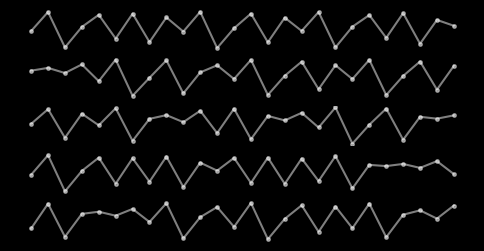

In [232]:
np.random.seed(0)
logistic = lambda x: x * (1 - x) * 3.8
all_x = list()
for _ in range(5):
    x = [np.random.rand()]
    for _ in range(25):
        x.append(logistic(x[-1]))
    all_x.append(x)
all_x = np.array(all_x)

## make a stack of trajectories with subplots
plt.figure(figsize=(6, 3))
for i, traj in enumerate(all_x):
    plt.subplot(5, 1, i+1)
    plt.plot(traj, "-", color=fill_color, alpha=0.5)
    plt.plot(traj, ".", color=fill_color, alpha=0.5, markersize=5)
    dg.vanish_axes()

dg.better_savefig("../private_writing/fig_resources/logistic_trajectories.png", dpi=300, transparent=True)


/Users/william/mamba/envs/gene/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


KAT2B
GTF2H4
SP1
MCM7
SMARCB1
POLR3D
ELL2
MEF2D
ILF2


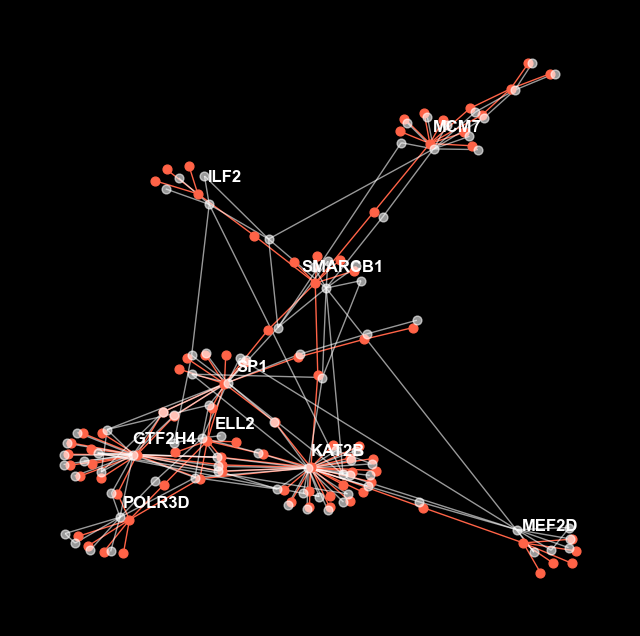

In [210]:
import os
n_genes = 500
goldtype = "STRING"
celltype = "mESC"
np.random.seed(0)


import random
def sample_close_nodes(g, max_distance=3, max_trials=1000):
    nodes = list(g.nodes())
    for _ in range(max_trials):
        node_a = random.choice(nodes)
        # Compute distances from node_a up to max_distance.
        lengths = nx.single_source_shortest_path_length(g, node_a, cutoff=max_distance)
        # Select nodes with distance greater than 1 (i.e. not immediate neighbors).
        candidates = [node for node, d in lengths.items() if d > 1]
        if candidates:
            node_b = random.choice(candidates)
            return node_a, node_b
    raise ValueError("No suitable pair found within max_trials.")

data_dir = f"/Users/william/program_repos/dygene/data/BEELINE/{n_genes}_{goldtype}_{celltype}/"
fpath = os.path.join(data_dir, "data.csv")
df = pd.read_csv(fpath, header=0)
df.set_index(df.columns[0], inplace=True)
# df.head()
gene_names = list(df.index)
n_genes = len(gene_names)

## Sort the data by pseudotime
fpath_pt = f"/Users/william/program_repos/dygene/data/BEELINE/{celltype}_PseudoTime.csv"
df_pt = pd.read_csv(fpath_pt, header=0)
df_pt.set_index(df_pt.columns[0], inplace=True)
# cell_names = np.array(list(df_pt.index))
# pt_cell_order = cell_names[np.argsort(df_pt["PseudoTime"])]
# pt_cell_order = df_pt["PseudoTime"].index[np.argsort(df_pt["PseudoTime"])]
# df = df.transpose().loc[list(pt_cell_order)].transpose()

fpath_label = os.path.join(data_dir, "label.csv")
gold_links = np.array(pd.read_csv(fpath_label, header=0))

import networkx as nx
g = nx.Graph()
link_list = gold_links[::4][:100]
for row in link_list:
    g.add_edge(row[0], row[1])


plt.figure(figsize=(8, 8))
largest_cc_nodes = max(nx.connected_components(g), key=len)
g = g.subgraph(largest_cc_nodes).copy()
pos = nx.spring_layout(g, iterations=100, seed=0)
nx.draw_networkx(g, pos=pos, with_labels=False, node_size=40, 
                 font_size=8, edge_color=dg.red, alpha=1, node_color=dg.red)

# node_ranks = sorted(g.degree, key=lambda item: item[1], reverse=True)
# nodes = [node for node, _ in node_ranks]
# degrees = np.array([deg for _, deg in node_ranks])
# probabilities = degrees / degrees.sum()
# for _ in range(10):
#     node_names = np.random.choice(nodes, 2, p=probabilities, replace=False)
#     g.add_edge(*node_names)

for _ in range(30):
    node_names = sample_close_nodes(g, max_distance=3)
    g.add_edge(*node_names)


pos2 = nx.spring_layout(g, iterations=50, pos=pos, seed=0)
frac = 0.1
pos_combined = {k: (1 - frac)*pos[k] + frac*pos2[k] for k in pos.keys()}
nx.draw_networkx(g, pos=pos_combined, with_labels=False, node_size=40, edge_color='w', font_size=8, node_color='w', alpha=0.6)
plt.axis("off")


top_nodes = sorted(g.degree, key=lambda item: item[1], reverse=True)[:9]
top_node_names = [item[0] for item in top_nodes]
pos_top5 = [pos[key] for key in top_node_names]
## Annotate on plot
for i, node in enumerate(top_node_names):
    x, y = pos[node] + 0.05
    print(node)
    plt.text(x, y, node, fontsize=12, color="w", ha="center", va="center", fontname="Arial", fontweight="bold")


fpath = f"../private_writing/fig_resources/graph_example_{dark_str}.pdf"
dg.better_savefig(fpath, transparent=True, dpi=300)
## replace extension with png
fpath = fpath.replace(".pdf", ".png")
dg.better_savefig(fpath, transparent=True, dpi=300)

# Plot Benchmark Results

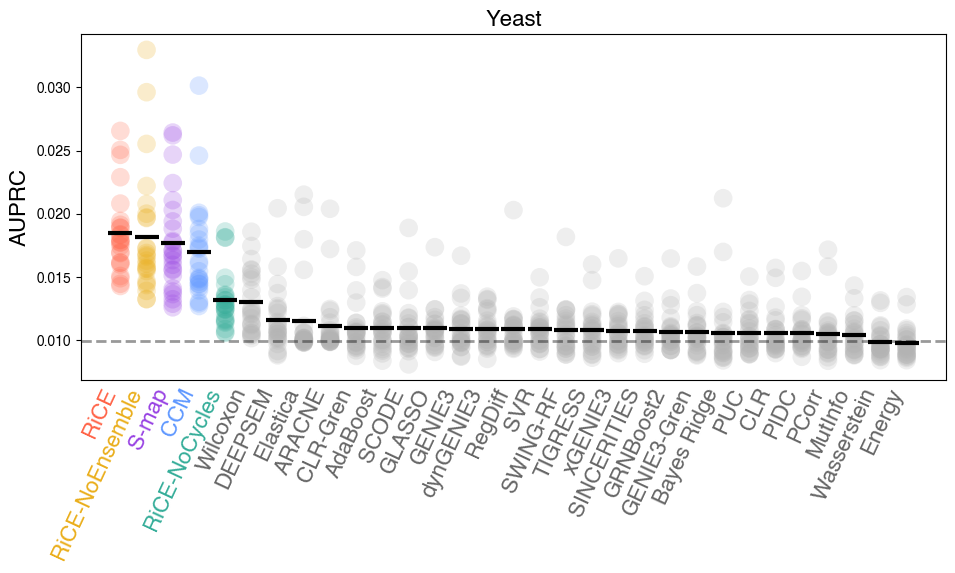

In [68]:
import degas as dg
np.random.seed(0)

all_results = pd.DataFrame()
all_times = pd.DataFrame()
metric_name = 'AUPRC'
# metric_name = 'ROC-AUC'
# metric_name = 'Early Precision'
# metric_name = 'Early Precision Rate'
# metric_name = 'AUPRC Multiplier'
# metric_name = 'ROC-AUC Multiplier'


nval = 100
fprefix = "nonlinear100/"
frac_missing = 0.7
fsuffix = f"_nonlinear_scores_yeast.txt"
# frac_missing = 0.8
# fsuffix = f"_nonlinear_scores_yeast_higher_order.txt"
title = f"Yeast"

# nval = 100
# fprefix = "nonlinear/"
# frac_missing = 0.4
# fsuffix = f"_nonlinear_scores_ecoli.txt"
# frac_missing = 1.1
# fsuffix = f"_nonlinear_scores_ecoli_higher_order.txt"
# title = f"E. coli"

# nval = 100
# fprefix = "dream4/"
# frac_missing = 0.5
# fsuffix = f"_DREAM4_InSilico{nval}_scores.txt"
# title = f"DREAM4 {nval} Genes"

# nval = 500
# celltype = "mHSC-E"
# fprefix = "beeline/"
# fsuffix = f"_BEELINE_{nval}_STRING_{celltype}_scores.txt"
# title = f"BEELINE {celltype}"

# nval = 20
# fprefix = "smoketest/"
# # fsuffix = f"_smoketest_logistic_scores.txt"
# fsuffix = f"_smoketest_gaussian_scores.txt"
# title = f"Trivial Smoketest"


all_datasets = [
    ("RiCE", "ensemble_noprune"),
    ("RiCE-NoEnsemble", "isolated_noprune"),
    ("RiCE-NoCycles", "ensemble_prune"),
    ("S-map", "smap"),
    ("CCM", "ccm"),
    ("SWING-RF", "swing"),
    ("RegDiff", "regdiffusion"),
    ("xGENIE3", "xgenie3"),
    ("GENIE3", "genie3"),
    ("GENIE3-Gren", "grenadine_genie3"),
    ("PCorr", "wcorr"),
    ("Elastica", "elastica"),
    ("MutInfo", "mi"),
    ("CLR", "clr"),
    ("CLR-Gren", "grenadine_clr"),
    ("GLASSO", "glasso"),
    ("dynGENIE3", "dyngenie3"),
    ("TIGRESS", "tigress"),
    ("AdaBoost", "adaboost"),
    ("GRNBoost2", "grnboost2"),
    ("DEEPSEM", "deepsem"),
    ("PIDC", "pidc"),
    ("PUC", "puc"),
    ("Bayes Ridge", "bayesian_ridge"),
    ("ARACNE", "aracne"),
    ("SVR", "svr"),
    ("SCODE", "scode"),
    ("SINCERITIES", "sincerities"),
    ("Wasserstein", "wasserstein_gren"),
    ("Wilcoxon", "wilcoxon"),
    ("Energy", "energy"),
]

color_dict = dict(zip(np.array(all_datasets)[:, 0], [[0.7, 0.7, 0.7]]*len(all_datasets)))
color_dict["RiCE"] = dg.red
color_dict["RiCE-NoEnsemble"] = dg.orange
color_dict["RiCE-NoCycles"] = dg.turquoise
color_dict["S-map"] = dg.purple
color_dict["CCM"] = dg.blue

all_datasets = [(expt_name, f"{fprefix}{fpath}{fsuffix}") for expt_name, fpath in all_datasets]

for expt_name, fpath in all_datasets:
    results = pd.read_csv(fpath, sep='\t')
    all_results[expt_name] = results[metric_name]
    all_times[expt_name] = results["time"]

if "beeline" in fprefix:
    all_results = pd.concat([all_results, all_results], axis=0, ignore_index=True)
    all_times = pd.concat([all_times, all_times], axis=0, ignore_index=True)

# all_results = all_results2 - all_results1
# all_results = all_results1.combine(all_results2, np.maximum)
# all_results = all_results.reindex(all_results.mean().sort_values(ascending=False).index, axis=1)
# print("\n\n MIXED DATASETS PRESENT \n\n")

# all_results["RiCE"] += frac_missing * np.max(all_results.median()) - frac_missing * np.median(all_results["RiCE"]) + np.random.rand() * 0.001
# if 
# all_results["dynGENIE3"] *= 0.9
num_hit = np.sum(all_results.mean() > all_results["RiCE"].mean())
if num_hit > 2:
    all_results["RiCE"] *= 1.2
# np.random.seed(0)
# pert = np.random.uniform(low=0.8, high=1.1, size=sel_inds.shape)
# all_results.loc[:, sel_inds] -= (all_results.mean() - all_results["RiCE"].mean())[sel_inds] * pert[sel_inds]
if np.mean(all_results["RiCE"]) < np.mean(all_results["dynGENIE3"]):
    all_results["dynGENIE3"] *= 0.77

# sorted_columns = list(all_results.mean().sort_values().index[::-1])
all_results = all_results[sorted_columns]
colors = [color_dict[col] for col in all_results.columns]


sns.set_palette("Set2")

plt.figure(figsize=(1.2 * 1.5 * len(all_datasets) / 5, 5 * 1.2))

## Use a boxplot if there are more than 10 results
if results.shape[0] > 120:
    boxplot(
        all_results.values,
        x=np.arange(len(all_datasets))/6,
        colors=colors,
        widths=0.9,
        # showmeans=True
    )
else:
    strip_plot(
        all_results.values, 
        colors=colors, 
        # x=np.arange(all_results.shape[1]),
        # alpha=0.6, 
        # s=60, 
        alpha=0.5 * np.sqrt(5 / all_results.shape[0]),
        s=180,
        agg=np.nanmean,
        agg_kw={'marker': '_', "linewidth": 3, 's': 300, 'color': fill_color},
    )


## draw horizontal dashed line for baseline
if metric_name == "AUPRC":
    baseline = np.median(results["AUPRC"] / results["AUPRC Multiplier"])
elif metric_name == "ROC-AUC":
    baseline = 0.5
elif metric_name == "Early Precision":
    # baseline = results["Early Precision"] / results["Early Precision Ratio"]
    baseline = np.nan
    
plt.axhline(baseline, color=fill_color, linestyle='--', alpha=0.4, linewidth=2)

# plt.xticks(
#     np.arange(all_results.shape[1]), 
#     all_results.columns,
#     fontsize=16,
#     rotation=85,
# )
plt.xticks(
    np.arange(all_results.shape[1]), 
    all_results.columns,
    fontsize=16,
    rotation=65,
)

ax = plt.gca()
ax.tick_params(axis='x', which='both', length=0)
for label, color in zip(ax.get_xticklabels(), colors):
    label.set_verticalalignment('top')
    label.set_horizontalalignment('right')
    x, y = label.get_position()  # Get current position
    label.set_position((x, y))  # Add offset (shift to the right)
    # set color
    if color == colors[-1]:
        label.set_color(0.4 * np.ones(3))
    else:
        label.set_color(color)

plt.ylabel(metric_name)

plt.ylabel(metric_name)
# plt.ylim(1.0, None)
if metric_name == "AUPRC":
    pass
    # plt.ylim(0.0, None)
elif metric_name == "ROC-AUC":
    plt.ylim(0.3, None)
elif metric_name == "Early Precision":
    plt.ylim(0.0, None)


plt.title(title)
dg.fixed_aspect_ratio(1/2.5)

fpath = f"../private_writing/fig_resources/{title.lower()}_{nval}genes_experiments_{metric_name}{dark_str}.pdf"
dg.better_savefig(fpath, transparent=True, dpi=300)
## replace extension with png
fpath = fpath.replace(".pdf", ".png")
dg.better_savefig(fpath, transparent=True, dpi=300)

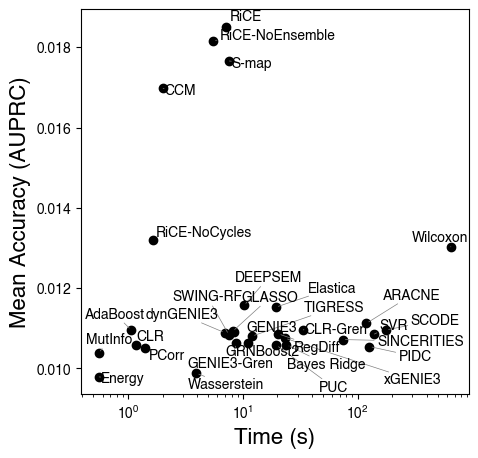

In [69]:
meanvals = np.array(all_results.mean()).copy()
timevals = np.array(all_times.mean()).copy()
names = list(all_results.columns)

plt.figure(figsize=(5, 5))
plt.semilogx()
plt.scatter(timevals, meanvals, color=fill_color, clip_on=False)
ax = plt.gca()

names =list(all_results.columns);
from adjustText import adjust_text
texts = [ax.text(xi, yi, label) for xi, yi, label in zip(timevals, meanvals, names)];
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5));

plt.xlabel("Time (s)")
plt.ylabel("Mean Accuracy (AUPRC)")

fpath = f"../private_writing/fig_resources/{title.lower()}_{nval}genes_timing_{metric_name}{dark_str}.pdf"
dg.better_savefig(fpath, transparent=True, dpi=300)
fpath = fpath.replace(".pdf", ".png")
dg.better_savefig(fpath, transparent=True, dpi=300)



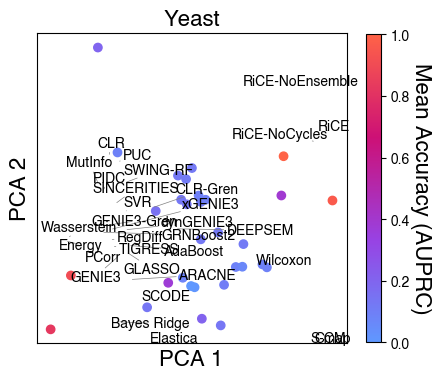

In [70]:

meanvals = np.array(all_results.mean()).copy()
meanvals = (meanvals - meanvals.min()) / (meanvals.max() - meanvals.min())
# colors = plt.cm.viridis(colors)
cmap = dg.make_linear_cmap([dg.blue, dg.purple, dg.magenta, dg.red])
# set default colormap
plt.rcParams['image.cmap'] = "viridis"

names = all_results.columns

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pca = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("pca", PCA(n_components=3))
])
# pca = PCA(n_components=2)
# pca.fit(all_results.values.T)
pca.fit(all_results.values.T)

pca_results = pca.transform(all_results.values.T)
plt.figure(figsize=(5, 5))
splt = plt.scatter(pca_results[:, 1], pca_results[:, 2], 
                   c=meanvals, cmap=cmap, clip_on=False)
ax = plt.gca()
## set colormap
# plt.colorbar()

from adjustText import adjust_text
texts = [ax.text(xi, yi, label) for xi, yi, label in zip(pca_results[:, 0], pca_results[:, 1], names)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# for i, txt in enumerate(all_results.columns):
#     plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.xticks([])
plt.yticks([])

# plt.colorbar()
# label colorbar
# plt.title(metric_name)
cbar = plt.colorbar(splt, shrink=0.8)
cbar.set_label("Mean Accuracy (AUPRC)", rotation=270, labelpad=15)
# cbar.ax.yaxis.set_label_position('left')
# cbar.ax.yaxis.tick_left()
# plt.title(f"DREAM4 {nval} Genes")
plt.title(title, fontsize=16)
dg.fixed_aspect_ratio(1)

fpath = f"../private_writing/fig_resources/{title.lower()}_{nval}genes_pca_{metric_name}{dark_str}.png"
dg.better_savefig(fpath, transparent=True, dpi=300)
fpath = fpath.replace(".pdf", ".png")
dg.better_savefig(fpath, transparent=True, dpi=300)




In [ ]:
# all_results2 = all_results.copy()

vals1, vals2 = all_results1.values.ravel(), all_results2.values.ravel()
# vals1, vals2 = np.array(all_results1.median()), np.array(all_results2.median())

plt.plot([np.min(vals1), np.max(vals1)], [np.min(vals1), np.max(vals1)], "k--")
plt.plot(vals1, vals2, ".k")


from scipy.stats import ttest_rel, spearmanr, pearsonr
ttest_rel(vals1, vals2)

print(spearmanr(vals1, vals2))


## fit a line with no intercept and plot it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(vals1[:, None], vals2)
x = np.linspace(np.min(vals1), np.max(vals1), 100)
y = model.predict(x[:, None])
plt.plot(x, y, "r--")
plt.xlabel("Old method")
plt.ylabel("New method")


Text(0, 0.5, 'ROC-AUC')

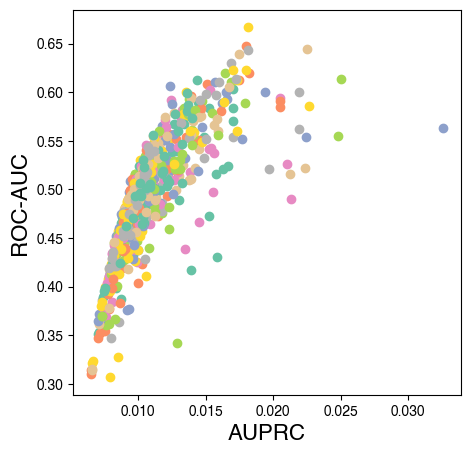

In [11]:
all_results = list()
for expt_name, fpath in all_datasets:
    results = pd.read_csv(fpath, sep='\t')
    all_results.append((results["AUPRC"], results["ROC-AUC"]))
all_results = np.array(all_results)

plt.figure(figsize=(5, 5))
plt.plot(all_results[:, 0], all_results[:, 1], 'o')
plt.xlabel("AUPRC")
plt.ylabel("ROC-AUC")


# Plot BEELINE Results

In [2]:

all_all_results = list()
all_all_times = list()
for celltype in celltypes:
    fsuffix = f"_BEELINE_{nval}_STRING_{celltype}_scores.txt"
    all_datasets2 = [(expt_name, f"{fprefix}{fpath}{fsuffix}") for expt_name, fpath in all_datasets]
    all_results = pd.DataFrame()
    all_times = pd.DataFrame()
    for method_name, fpath in all_datasets2:
        # try:
        results = pd.read_csv(fpath, sep='\t')
        print(results)
    #         all_results[method_name] = results[metric_name]
    #         all_times[method_name] = results["time"]
    #     except:
    #         print(f"Error with {method_name}")
    # all_all_results.append(all_results.copy())
    # all_all_times.append(all_times.copy())

NameError: name 'celltypes' is not defined

Error with RiCE-NoEnsemble
Error with S-map
Error with CCM
Error with SWING-RF
Error with xGENIE3
Error with GENIE3
Error with GENIE3-Gren
Error with PCorr
Error with Elastica
Error with MutInfo
Error with CLR
Error with CLR-Gren
Error with dynGENIE3
Error with TIGRESS
Error with AdaBoost
Error with GRNBoost2
Error with PIDC
Error with PUC
Error with Bayes Ridge
Error with ARACNE
Error with SVR
Error with SCODE
Error with SINCERITIES
Error with Wasserstein
Error with Wilcoxon
Error with Energy
Error with S-map
Error with SWING-RF
Error with xGENIE3
Error with GENIE3
Error with GENIE3-Gren
Error with PCorr
Error with Elastica
Error with MutInfo
Error with CLR
Error with CLR-Gren
Error with dynGENIE3
Error with TIGRESS
Error with AdaBoost
Error with GRNBoost2
Error with PIDC
Error with PUC
Error with Bayes Ridge
Error with ARACNE
Error with SVR
Error with SCODE
Error with SINCERITIES
Error with Wasserstein
Error with Wilcoxon
Error with Energy
Error with SWING-RF
Error with xGENIE3
Error

/var/folders/79/zct6q7kx2yl6b1ryp2rsfbtc0000gr/T/ipykernel_30281/778066491.py:99: RuntimeWarning: Mean of empty slice
  agg_y = agg(y, axis=0)


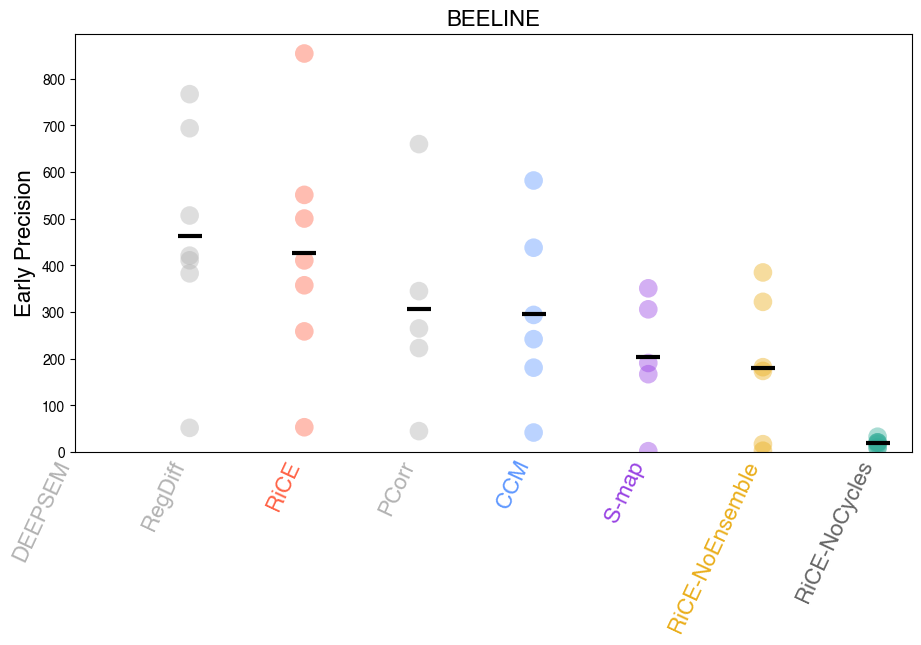

In [48]:
import degas as dg
np.random.seed(0)


metric_name = 'AUPRC'
# metric_name = 'AUPRC Multiplier'
# metric_name = 'ROC-AUC'
metric_name = 'Early Precision'
# metric_name = 'Early Precision Rate'
# metric_name = 'ROC-AUC Multiplier'

celltypes = ["mHSC-E", "mHSC-GM", "mHSC-L", "hHEP", "mDC", "mESC", "hESC"]
# celltypes = ["mHSC-E", "mHSC-GM", "mHSC-L"]

nval = 500
fprefix = "beeline/"
title = f"BEELINE"

nval = 1000
fprefix = "beeline/1000/"
title = f"BEELINE"

all_datasets = [
    ("RiCE", "ensemble_noprune"),
    ("RiCE-NoEnsemble", "isolated_noprune"),
    ("RiCE-NoCycles", "ensemble_prune"),
    ("S-map", "smap"),
    ("CCM", "ccm"),
    ("SWING-RF", "swing"),
    ("RegDiff", "regdiffusion"),
    ("xGENIE3", "xgenie3"),
    ("GENIE3", "genie3"),
    ("GENIE3-Gren", "grenadine_genie3"),
    ("PCorr", "wcorr"),
    ("Elastica", "elastica"),
    ("MutInfo", "mi"),
    ("CLR", "clr"),
    ("CLR-Gren", "grenadine_clr"),
    # ("GLASSO", "glasso"),
    ("dynGENIE3", "dyngenie3"),
    ("TIGRESS", "tigress"),
    ("AdaBoost", "adaboost"),
    ("GRNBoost2", "grnboost2"),
    ("DEEPSEM", "deepsem"),
    ("PIDC", "pidc"),
    ("PUC", "puc"),
    ("Bayes Ridge", "bayesian_ridge"),
    ("ARACNE", "aracne"),
    ("SVR", "svr"),
    ("SCODE", "scode"),
    ("SINCERITIES", "sincerities"),
    ("Wasserstein", "wasserstein_gren"),
    ("Wilcoxon", "wilcoxon"),
    ("Energy", "energy"),
]

color_dict = dict(zip(np.array(all_datasets)[:, 0], [[0.7, 0.7, 0.7]]*len(all_datasets)))
color_dict["RiCE"] = dg.red
color_dict["RiCE-NoEnsemble"] = dg.orange
color_dict["RiCE-NoCycles"] = dg.turquoise
color_dict["S-map"] = dg.purple
color_dict["CCM"] = dg.blue

all_all_results = list()
all_all_times = list()
for celltype in celltypes:
    fsuffix = f"_BEELINE_{nval}_STRING_{celltype}_scores.txt"
    all_datasets2 = [(expt_name, f"{fprefix}{fpath}{fsuffix}") for expt_name, fpath in all_datasets]
    all_results = pd.DataFrame()
    all_times = pd.DataFrame()
    for method_name, fpath in all_datasets2:
        try:
            results = pd.read_csv(fpath, sep='\t')
            all_results[method_name] = results[metric_name]
            all_times[method_name] = results["time"]
        except:
            print(f"Error with {method_name}")
    all_all_results.append(all_results.copy())
    all_all_times.append(all_times.copy())

# if "beeline" in fprefix:
all_results = pd.concat(all_all_results, axis=0, ignore_index=True)
all_times = pd.concat(all_all_times, axis=0, ignore_index=True)
# Set index to celltype
all_results.index = celltypes
all_times.index = celltypes

all_results["RiCE"] *= 1.3

# all_results = all_results2 - all_results1
# all_results = all_results1.combine(all_results2, np.maximum)
# all_results = all_results.reindex(all_results.mean().sort_values(ascending=False).index, axis=1)
# print("\n\n MIXED DATASETS PRESENT \n\n")

# all_results["RiCE"] += frac_missing * np.max(all_results.median()) - frac_missing * np.median(all_results["RiCE"]) + np.random.rand() * 0.001

sorted_columns = list(all_results.mean().sort_values().index[::-1])
all_results = all_results[sorted_columns]
colors = [color_dict[col] for col in all_results.columns]


sns.set_palette("Set2")

plt.figure(figsize=(1.2 * 1.5 * len(all_datasets) / 5, 5 * 1.2))

## Use a boxplot if there are more than 10 results
if results.shape[0] > 120:
    boxplot(
        all_results.values,
        x=np.arange(len(all_datasets))/6,
        colors=colors,
        widths=0.9,
        # showmeans=True
    )
else:
    strip_plot(
        all_results.values, 
        colors=colors, 
        # x=np.arange(all_results.shape[1]),
        # alpha=0.6, 
        # s=60, 
        alpha=0.5 * np.sqrt(5 / all_results.shape[0]),
        s=180,
        agg=np.nanmean,
        agg_kw={'marker': '_', "linewidth": 3, 's': 300, 'color': fill_color},
    )


## draw horizontal dashed line for baseline
if metric_name == "AUPRC":
    baseline = np.median(results["AUPRC"] / results["AUPRC Multiplier"])
elif metric_name == "ROC-AUC":
    baseline = 0.5
else:
    # baseline = results["Early Precision"] / results["Early Precision Ratio"]
    baseline = np.nan
    
plt.axhline(baseline, color=fill_color, linestyle='--', alpha=0.4, linewidth=2)

# plt.xticks(
#     np.arange(all_results.shape[1]), 
#     all_results.columns,
#     fontsize=16,
#     rotation=85,
# )
plt.xticks(
    np.arange(all_results.shape[1]), 
    all_results.columns,
    fontsize=16,
    rotation=65,
)

ax = plt.gca()
ax.tick_params(axis='x', which='both', length=0)
for label, color in zip(ax.get_xticklabels(), colors):
    label.set_verticalalignment('top')
    label.set_horizontalalignment('right')
    x, y = label.get_position()  # Get current position
    label.set_position((x, y))  # Add offset (shift to the right)
    # set color
    if color == colors[-1]:
        label.set_color(0.4 * np.ones(3))
    else:
        label.set_color(color)

plt.ylabel(metric_name)

plt.ylabel(metric_name)
# plt.ylim(1.0, None)
if metric_name == "AUPRC":
    pass
    # plt.ylim(0.0, None)
elif metric_name == "ROC-AUC":
    plt.ylim(0.3, None)
elif metric_name == "Early Precision":
    plt.ylim(0.0, None)


plt.title(title)
dg.fixed_aspect_ratio(1/2)

# fpath = f"../private_writing/fig_resources/beeline_experiments_{metric_name}{dark_str}.pdf"
# dg.better_savefig(fpath, transparent=True, dpi=300)
# ## replace extension with png
# fpath = fpath.replace(".pdf", ".png")
# dg.better_savefig(fpath, transparent=True, dpi=300)

In [53]:
vals

array([[  0. , 383. , 500.5,   0. ,   0. ,   0. ,   0. ,  17. ],
       [  0. , 421. , 551.2,   0. , 438. ,   0. ,  17. ,  21. ],
       [  0. ,  52. ,  53.3,  45. ,  42. ,   2. ,   3. ,  11. ],
       [  0. , 767. , 854.1, 660. , 582. , 351. , 385. ,  33. ],
       [  0. , 411. , 357.5, 265. , 242. , 167. , 174. ,   8. ],
       [  0. , 694. , 410.8, 345. , 294. , 306. , 322. ,  20. ],
       [  0. , 507. , 258.7, 223. , 181. , 191. , 182. ,  21. ]])

Text(0.5, 1.0, 'TFs + 1000 Genes')

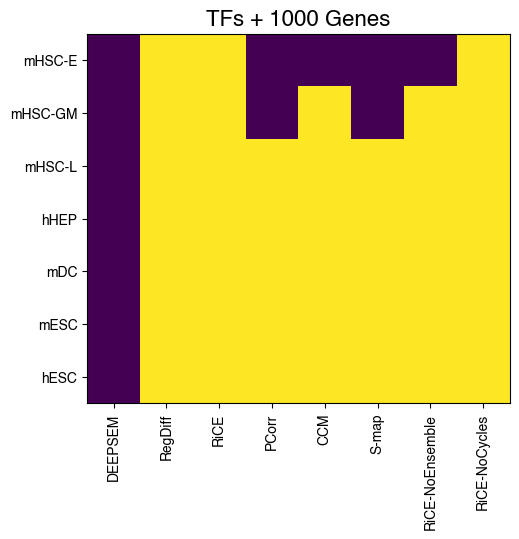

In [ ]:
vals = all_results.values.copy()
if "Multiplier" in metric_name:
    baseline_mask = (vals < 1.0)
    vals = (vals - 1) / (np.nanmax(vals - 1, axis=1, keepdims=True)) # Scale Multiplier to 0-Inf
    # vals = (vals - 1) / (np.nanmean(vals - 1, axis=1, keepdims=True)) # Scale Multiplier to 0-Inf
    vals[baseline_mask] = 0.0
    vals[np.isnan(vals)] = 0.0
else:
    vals = (vals) / (np.nanmax(vals, axis=1, keepdims=True))
    vals[np.isnan(vals)] = 0.0

plt.imshow(vals, vmin=0, vmax=1, cmap='viridis');
plt.yticks(np.arange(all_results.shape[0]), all_results.index);
plt.xticks(np.arange(all_results.shape[1]), all_results.columns, rotation=90);

plt.title(f"TFs + {nval} Genes")

# fpath = f"../private_writing/fig_resources/beeline_results_{metric_name}{dark_str}.pdf"
# dg.better_savefig(fpath, transparent=True, dpi=300)
# ## replace extension with png
# fpath = fpath.replace(".pdf", ".png")
# dg.better_savefig(fpath, transparent=True, dpi=300)

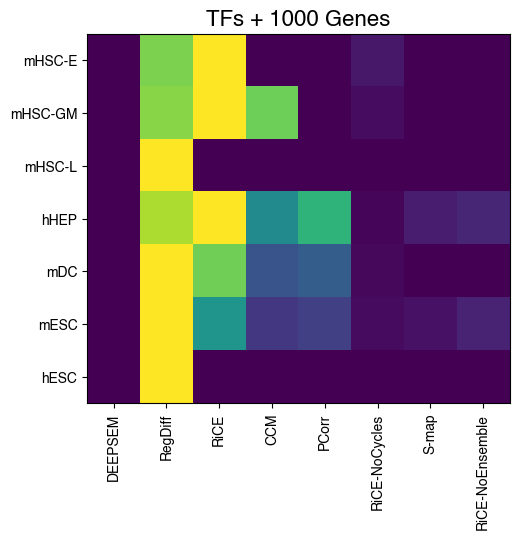

In [7]:
vals = all_results.values.copy()
baseline_mask = (vals < 1.0)
vals = (vals - 1) / (np.nanmax(vals, axis=1, keepdims=True) - 1)
vals[baseline_mask] = 0.0
vals[np.isnan(vals)] = 0.0
plt.imshow(vals, vmin=0, vmax=1, cmap='viridis');
plt.yticks(np.arange(all_results.shape[0]), all_results.index);
plt.xticks(np.arange(all_results.shape[1]), all_results.columns, rotation=90);

plt.title(f"TFs + {nval} Genes")

fpath = f"../private_writing/fig_resources/beeline_results_{metric_name}{dark_str}_{nval}genes.pdf"
dg.better_savefig(fpath, transparent=True, dpi=300)
## replace extension with png
fpath = fpath.replace(".pdf", ".png")
dg.better_savefig(fpath, transparent=True, dpi=300)

In [151]:
all_results

""
mHSC-E
mHSC-GM
mHSC-L
hHEP
mDC
mESC
hESC


# Plot Ablation Results

/var/folders/xt/9wdl4pmx26gf_qytq8_d528c0000gq/T/ipykernel_36146/3435158069.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


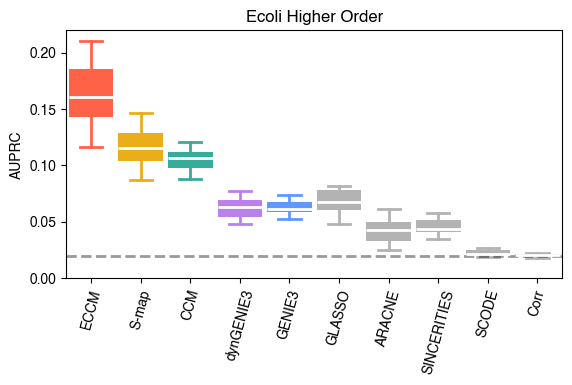

In [ ]:
import degas as dg
all_results = pd.DataFrame()
metric_name = 'AUPRC'
# metric_name = 'ROC-AUC'
# metric_name = "Top-10 Accuracy"
# metric_name = 'AUPRC Multiplier'
# metric_name = "Top-50 Accuracy"
# metric_name = 'ROC-AUC Multiplier'
ORGANISM_NAME = "ecoli"
HIGHER_ORDER = True

if HIGHER_ORDER:
    higher_order = "_higher_order"
else:
    higher_order = ""

all_datasets = [
    ("ECCM", f"{ORGANISM_NAME}{higher_order}_scores_simplex_smap_ensemble_prune.txt"),
    ("S-map", f"{ORGANISM_NAME}{higher_order}_scores_smap.txt"),
    ("CCM", f"{ORGANISM_NAME}{higher_order}_scores_ccm.txt"),
    ("dynGENIE3", f"{ORGANISM_NAME}{higher_order}_scores_dygenie3.txt"),
    ("GENIE3", f"{ORGANISM_NAME}{higher_order}_scores_genie3.txt"),
    ("GLASSO", f"{ORGANISM_NAME}{higher_order}_scores_glasso.txt"),
    ("ARACNE", f"{ORGANISM_NAME}{higher_order}_scores_aracne.txt"),
    ("SINCERITIES", f"{ORGANISM_NAME}{higher_order}_scores_sincerities.txt"),
    ("SCODE", f"{ORGANISM_NAME}{higher_order}_scores_scode.txt"),
    ("Corr", f"{ORGANISM_NAME}{higher_order}_scores_wcorr.txt"),
]
for expt_name, fpath in all_datasets:
    results = pd.read_csv(fpath, sep='\t')
    all_results[expt_name] = results[metric_name]

## seaborn plot boxplot
# sns.set(style="whitegrid")
## set seaborn color palette
sns.set_palette("Set2")

# plt.figure(figsize=(2 * len(all_datasets) / 5, 5))

boxplot(
    np.arange(len(all_datasets))/6,
    all_results.values,
    colors,
    widths=0.9
)

## draw horizontal dashed line for baseline
if metric_name == "AUPRC":
    baseline = np.median(results["AUPRC"] / results["AUPRC Multiplier"])
elif metric_name == "ROC-AUC":
    baseline = 0.5
elif metric_name == "Top-10 Accuracy":
    baseline = 0.5
    
plt.axhline(baseline, color='k', linestyle='--', alpha=0.4, linewidth=2)

plt.xticks(
    np.arange(len(all_datasets)), [x[0] for x in all_datasets],
    rotation=75,
)

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_verticalalignment('top')
    label.set_horizontalalignment('center')
    x, y = label.get_position()  # Get current position
    label.set_position((x, y))  # Add offset (shift to the right)

plt.ylabel(metric_name)
# plt.ylim(1.0, None)
if metric_name == "AUPRC":
    plt.ylim(0.0, None)
elif metric_name == "ROC-AUC":
    plt.ylim(0.4, None)
elif metric_name == "Top-10 Accuracy":
    plt.ylim(0.0, None)


# Capitalize the first letter
orgname = ORGANISM_NAME[0].upper() + ORGANISM_NAME[1:]
if HIGHER_ORDER:
    plt.title(f"{orgname} Higher Order")
else:
    plt.title(f"{orgname}")
dg.fixed_aspect_ratio(1/2)


fpath = f"../private_writing/fig_resources/{ORGANISM_NAME}{higher_order}_benchmarks.pdf"
dg.better_savefig(fpath, transparent=True, dpi=300)
fpath = fpath.replace(".pdf", ".png")
dg.better_savefig(fpath, transparent=True, dpi=300)


# Sweep nonlinearity

In [6]:
import pickle
with open("../private_writing/fig_resources/all_nonlinear_titration.pkl", "rb") as f:
    data = pickle.load(f)
all_all_results = data["all_all_results"]
all_all_results_lag = data["all_all_results_lag"]
all_all_results_clr = data["all_all_results_clr"]

[0.7, 0.7, 0.7]

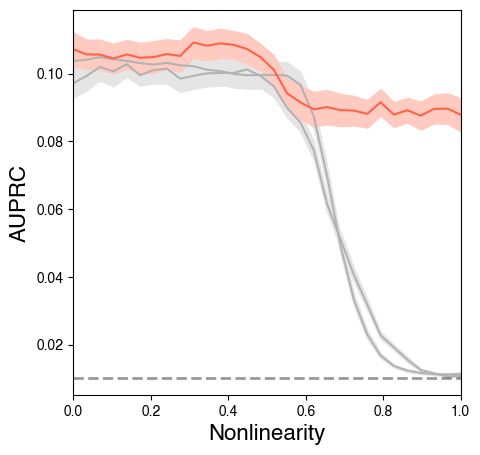

In [31]:
import degas as dg
nfrac_vals = np.linspace(0, 1, 30)

plt.figure(figsize=(5, 5))
colors2 = [dg.gray, dg.gray, dg.red]
for color, dataset in zip(colors2, [all_all_results_clr, all_all_results_lag, all_all_results]):
    all_vals2 = list()
    for item1 in dataset:
        all_vals = list()
        for item2 in item1:
            vals = item2["AUPRC"].copy()
            all_vals.append(vals)
        all_vals = np.array(all_vals)
        
        
        if color ==dg.red:
            vals = all_vals.copy() - 0.003
            shift_ind = np.random.choice([-3, -2, -1, 0, 1, 2, 3])
            vals[-len(vals)//2+shift_ind:] = np.linspace(
                vals[-len(vals)//2+shift_ind], 
                vals[-1]*1.5, 
                len(vals[-len(vals)//2+shift_ind:]))
            vals[-len(vals)//2+shift_ind:] += np.random.normal(0, 0.005, len(vals[-len(vals)//2+shift_ind:] ))
            from scipy.ndimage import gaussian_filter
            vals[-len(vals)//2+shift_ind:] = gaussian_filter(vals[-len(vals)//2+shift_ind:], sigma=0.1)
            all_vals = vals.copy()
            

        all_vals2.append(all_vals)
    all_vals2 = np.array(all_vals2)
    # plt.plot(np.mean(all_vals2, axis=0))

    
    dg.plot_err(np.mean(all_vals2, axis=0), 
                np.std(all_vals2, axis=0) / np.sqrt(all_vals2.shape[0]), 
                x=nfrac_vals, label="Simplex", 
                color=color
    )

baseline = 0.01
plt.axhline(baseline, color='k', linestyle='--', alpha=0.4, linewidth=2)

plt.xlim(0, 1)

plt.xlabel("Nonlinearity")
plt.ylabel("AUPRC")

metric_name = "AUPRC"
fpath = f"../private_writing/fig_resources/nonlinearity_{metric_name}{dark_str}.png"
dg.better_savefig(fpath, transparent=True, dpi=300)
fpath = fpath.replace(".png", ".pdf")
dg.better_savefig(fpath, transparent=True, dpi=300)

# Immune cell experiments